<a href="https://colab.research.google.com/github/treefield00/PythonNewText4DA/blob/main/python_data_analysis_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▶︎4.2 pandas

## ▶︎4.2.1 pandasの概要

### ●pandas とは

In [ ]:
import pandas as pd

### ●Seriesとは

In [ ]:
ser = pd.Series([10,20,30,40])
ser

0    10
1    20
2    30
3    40
dtype: int64

### ●DataFrameとは

In [ ]:
df = pd.DataFrame([[10,"a",True],
                   [20,"b",False],
                   [30,"c",False],
                   [40,"d",True]])
df

,0,1,2
0,10,a,True
1,20,b,False
2,30,c,False
3,40,d,True


DataFrameの列にデータ型が混在している場合は、データ型がオブジェクトとなる  
その場合は数値計算できない

### ●DataFrameの概要を見る

In [ ]:
import numpy as np
df = pd.DataFrame(np.arange(100).reshape((25,4)))

In [ ]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35
9,36,37,38,39


In [ ]:
# headメソッド
df.head()

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
# tailメソッド
df.tail()

,0,1,2,3
20,80,81,82,83
21,84,85,86,87
22,88,89,90,91
23,92,93,94,95
24,96,97,98,99


In [ ]:
# shape属性
df.shape

(25, 4)

### ●インデックス名、カラム名

In [ ]:
df = pd.DataFrame(np.arange(6).reshape((3,2)))
df

,0,1
0,0,1
1,2,3
2,4,5


In [ ]:
df.index = ["01", "02", "03"]
df.columns = ["A", "B"]
df

,A,B
01,0,1
02,2,3
03,4,5


In [ ]:
named_df = pd.DataFrame(np.arange(6).reshape((3,2)),
                        columns = ["A列", "B列"],
                        index = ["１行目","２行目","３行目"])
named_df

,A列,B列
１行目,0,1
２行目,2,3
３行目,4,5


In [ ]:
# dict形式で指定

pd.DataFrame({"A列":[0,2,4],"B列":[1,3,5]})

,A列,B列
0,0,1
1,2,3
2,4,5


### ●データの抽出

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = ["A","B","C"],
                  index = ["１行目","２行目","３行目","４行目"])
df

,A,B,C
１行目,0,1,2
２行目,3,4,5
３行目,6,7,8
４行目,9,10,11


In [ ]:
# 結果は１次元データなので、Seriesオブジェクトが返る

df["A"]

１行目    0
２行目    3
３行目    6
４行目    9
Name: A, dtype: int64

In [ ]:
# 複数カラムを取得
# リストで指定

df[["A","B"]]

,A,B
１行目,0,1
２行目,3,4
３行目,6,7
４行目,9,10


In [ ]:
# インデックス値を指定

df[:2]

,A,B,C
１行目,0,1,2
２行目,3,4,5


In [ ]:
df[2:]

,A,B,C
３行目,6,7,8
４行目,9,10,11


In [ ]:
df[1:3]

,A,B,C
２行目,3,4,5
３行目,6,7,8


In [ ]:
df[1]

KeyError: ignored

In [ ]:
df["A":"B"]

,A,B,C


In [ ]:
df["１行目"]

KeyError: ignored

上記の[ ]（角かっこ）指定方法では曖昧

In [ ]:
# locメソッド
# コピーではなく参照

df.loc[:,:]

,A,B,C
１行目,0,1,2
２行目,3,4,5
３行目,6,7,8
４行目,9,10,11


In [ ]:
# Aカラムのみ
# Series
# df["A"] と同じ

df.loc[:,"A"]

１行目    0
２行目    3
３行目    6
４行目    9
Name: A, dtype: int64

In [ ]:
# 複数カラム
# df[["A","B"]]と同じ

df.loc[:,["A","B"]]

,A,B
１行目,0,1
２行目,3,4
３行目,6,7
４行目,9,10


In [ ]:
# インデックス方向の抽出
# Series

df.loc["１行目",:]

A    0
B    1
C    2
Name: １行目, dtype: int64

In [ ]:
# 複数のインデックス

df.loc[["１行目","３行目"],:]

,A,B,C
１行目,0,1,2
３行目,6,7,8


In [ ]:
# インデックス名とカラム名

df.loc[["１行目"],["A","C"]]

,A,C
１行目,0,2


In [ ]:
# インデックス名とカラム名

df.loc[["１行目"],["C"]]

,C
１行目,2


In [ ]:
# インデックス名とカラム名

df.loc["１行目","C"]

2

In [ ]:
# ilocメソッド
# 位置指定なので整数値が返る

df.iloc[1,1]

4

In [ ]:
# ilocメソッド
# []配列指定なのでDFが返る

df.iloc[[1],[1]]

,B
２行目,4


In [ ]:
# ilocメソッド
# 列指定なのでSeriesが返る

df.iloc[[1],1]

２行目    4
Name: B, dtype: int64

In [ ]:
# ilocメソッド
# 行指定なのでSeriesが返る

df.iloc[1,[1]]

B    4
Name: ２行目, dtype: int64

In [ ]:
# ilocメソッド
# 指定なのでDFが返る

df.iloc[1:,[1]]

,B
２行目,4
３行目,7
４行目,10


In [ ]:
# ilocメソッド
# 行指定なのでSeriesが返る

df.iloc[1,[1,2]]

B    4
C    5
Name: ２行目, dtype: int64

In [ ]:
# 1カラム指定なのでSeriesが返る

df.iloc[1:,1]

２行目     4
３行目     7
４行目    10
Name: B, dtype: int64

In [ ]:
# 1行指定なのでSeriesが返る

df.iloc[1,1:]

B    4
C    5
Name: ２行目, dtype: int64

In [ ]:
# 行、列とも範囲指定なのでDFが返る

df.iloc[1:,:2]

,A,B
２行目,3,4
３行目,6,7
４行目,9,10


In [ ]:
# 配列指定

df.iloc[[1,2],[1,2]]

,B,C
２行目,4,5
３行目,7,8


In [ ]:
# syntax error

df.iloc[[1:2],[1:2]]

SyntaxError: ignored

In [ ]:
# 配列指定

df.iloc[[1,2],[0,1,2]]

,A,B,C
２行目,3,4,5
３行目,6,7,8


In [ ]:
# invalid syntax

df.iloc[[1,2],[0:2]]

SyntaxError: ignored

In [ ]:
# 配列指定

df.iloc[[1,3],[0,2]]

,A,C
２行目,3,5
４行目,9,11


## ▶︎4.2.2 データの読み込み・書き込み

### ●データ読み込み：CSVファイル

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Files/201704health.csv", encoding="utf-8")
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### ●データ読み込み：Excelファイル

In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Files/201704health.xlsx")
df 

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### ●データ読み込み webサイトのHTMLから票を取得

In [ ]:
# import urllib.parse

# url = "https://ja.wikipedia.org/wiki/トップレベルドメイン一覧"

# url = "ja.wikipedia.org/wiki/トップレベルドメイン一覧"

url = "https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7"

#urlp = urllib.parse.quote(url)#
#print(urlp)

tables = pd.read_html(url)

In [ ]:
len(tables)

43

In [ ]:
df = tables[4]
df

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...
248,.ye,イエメン,NaN,NaN,NaN,No,No,NaN
249,.yt,マヨット島,NaN,欧州連合・スイス・ノルウェー・アイスランド・リヒテンシュタインの個人・企業に限る[cctld...,Yes[cctld 12],Yes,Yes,NaN
250,.za,南アフリカ,Zuid-Afrika (オランダ語),NaN,NaN,No,No,NaN
251,.zm,ザンビア,NaN,NaN,NaN,Yes,Yes[cctld 28],NaN


### ●データ書き込み：CSVファイル

In [ ]:
df.to_csv("/content/drive/My Drive/Colab Files/write_data.csv")

### ●データ書き込み：Excelファイル

In [ ]:
df.to_excel("/content/drive/My Drive/Colab Files/write_data.xlsx")

### ●データの再利用

In [ ]:
df.to_pickle("/content/drive/My Drive/Colab Files/write_data.pickle")

In [ ]:
df1 = pd.read_pickle("/content/drive/My Drive/Colab Files/write_data.pickle")
df1

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...
248,.ye,イエメン,NaN,NaN,NaN,No,No,NaN
249,.yt,マヨット島,NaN,欧州連合・スイス・ノルウェー・アイスランド・リヒテンシュタインの個人・企業に限る[cctld...,Yes[cctld 12],Yes,Yes,NaN
250,.za,南アフリカ,Zuid-Afrika (オランダ語),NaN,NaN,No,No,NaN
251,.zm,ザンビア,NaN,NaN,NaN,Yes,Yes[cctld 28],NaN


## ▶︎4.2.3 データの整形

In [ ]:
import pandas as pd
import numpy as np


### ●使用するデータの読み込み

In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Files/201704health.xlsx")
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### ●条件で抽出

In [ ]:
df["歩数"] >= 10000

# df.loc[:,"歩数"] >= 10000
# と同じ

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: 歩数, dtype: bool

In [ ]:
df_selected = df[df["歩数"] >= 10000]
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [ ]:
df_selected.shape

(5, 3)

In [ ]:
df_selected = df[df.loc[:,"歩数"] >= 10000]
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [ ]:
# queryメソッド

df.query('歩数 >= 10000 and 摂取カロリー <= 1800')

,日付,歩数,摂取カロリー
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800


### ●データ型変換

In [ ]:
df.dtypes

日付        object
歩数         int64
摂取カロリー     int64
dtype: object

In [ ]:
# applyメソッド データ１つずつに順次関数を適用する
# to_datetime関数を適用

df.loc[:, 'date'] = df.loc[:, '日付'].apply(pd.to_datetime)

In [ ]:
df.loc[:, 'date']

0    2017-04-01
1    2017-04-02
2    2017-04-03
3    2017-04-04
4    2017-04-05
5    2017-04-06
6    2017-04-07
7    2017-04-08
8    2017-04-09
9    2017-04-10
10   2017-04-11
11   2017-04-12
12   2017-04-13
13   2017-04-14
14   2017-04-15
15   2017-04-16
16   2017-04-17
17   2017-04-18
18   2017-04-19
19   2017-04-20
20   2017-04-21
21   2017-04-22
22   2017-04-23
23   2017-04-24
24   2017-04-25
25   2017-04-26
26   2017-04-27
27   2017-04-28
28   2017-04-29
29   2017-04-30
Name: date, dtype: datetime64[ns]

In [ ]:
df

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500,2017-04-01
1,2017-04-02,2510,2300,2017-04-02
2,2017-04-03,10238,1950,2017-04-03
3,2017-04-04,8209,1850,2017-04-04
4,2017-04-05,9434,1930,2017-04-05
5,2017-04-06,7593,1800,2017-04-06
6,2017-04-07,9320,1940,2017-04-07
7,2017-04-08,4873,2300,2017-04-08
8,2017-04-09,12045,1950,2017-04-09
9,2017-04-10,7493,1850,2017-04-10


In [ ]:
df.dtypes

日付                object
歩数                 int64
摂取カロリー             int64
date      datetime64[ns]
dtype: object

In [ ]:
# astypeメソッド

df.loc[:,"摂取カロリー"] = df.loc[:,"摂取カロリー"].astype(np.float32)

In [ ]:
# set_index メソッド

df = df.set_index("date")

In [ ]:
df.head()

,日付,歩数,摂取カロリー
date,,,
2017-04-01,2017-04-01,5439,2500.0
2017-04-02,2017-04-02,2510,2300.0
2017-04-03,2017-04-03,10238,1950.0
2017-04-04,2017-04-04,8209,1850.0
2017-04-05,2017-04-05,9434,1930.0


### ●並べ替え

In [ ]:
df.sort_values(by="歩数")

,日付,歩数,摂取カロリー
date,,,
2017-04-02,2017-04-02,2510,2300.0
2017-04-23,2017-04-23,3890,1950.0
2017-04-22,2017-04-22,4029,2300.0
2017-04-30,2017-04-30,4093,1950.0
2017-04-08,2017-04-08,4873,2300.0
2017-04-01,2017-04-01,5439,2500.0
2017-04-29,2017-04-29,6033,2300.0
2017-04-12,2017-04-12,6481,2300.0
2017-04-27,2017-04-27,7203,1930.0


In [ ]:
df.sort_values(by="歩数", ascending=False).head()

,日付,歩数,摂取カロリー
date,,,
2017-04-20,2017-04-20,15328,1800.0
2017-04-21,2017-04-21,12849,1940.0
2017-04-09,2017-04-09,12045,1950.0
2017-04-13,2017-04-13,10287,1800.0
2017-04-03,2017-04-03,10238,1950.0


### ●不要なカラムの削除

In [ ]:
# drop メソッド

df = df.drop("日付", axis=1)

In [ ]:
df.tail()

,歩数,摂取カロリー
date,,
2017-04-26,7492,1850.0
2017-04-27,7203,1930.0
2017-04-28,7302,1850.0
2017-04-29,6033,2300.0
2017-04-30,4093,1950.0


### ●組み合わせデータの挿入

In [ ]:
df.loc[:,"歩数/カロリー"] = df.loc[:,"歩数"] / df.loc[:, "摂取カロリー"]
df

,歩数,摂取カロリー,歩数/カロリー
date,,,
2017-04-01,5439,2500.0,2.175600
2017-04-02,2510,2300.0,1.091304
2017-04-03,10238,1950.0,5.250256
2017-04-04,8209,1850.0,4.437297
2017-04-05,9434,1930.0,4.888083
2017-04-06,7593,1800.0,4.218333
2017-04-07,9320,1940.0,4.804124
2017-04-08,4873,2300.0,2.118696
2017-04-09,12045,1950.0,6.176923


In [ ]:
def exercise_judge(ex):
    if ex <= 3.0:
        return "Low"
    elif 3.0 < ex <= 6.0:
        return "Mid"
    else:
        return "High"


In [ ]:
# applyメソッド

df.loc[:, "運動指数"] = df.loc[:, "歩数/カロリー"].apply(exercise_judge)
df

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


In [ ]:
df.to_pickle("/content/drive/My Drive/Colab Files/df_201704health.pickle")

In [ ]:
# get_dummies メソッド　prefix引数

df_moved = pd.get_dummies(df.loc[:, "運動指数"], prefix="運動")
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [ ]:
df_moved.to_pickle("/content/drive/My Drive/Colab Files/df_201704moved.pickle")

## ▶︎4.2.4 時系列データ

### ●１ヶ月分のデータを作る

In [ ]:
# date_range関数
# start引数  end引数

dates = pd.date_range(start="2017-04-01", end="2017-04-30")
dates

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
np.random.seed(123)

df = pd.DataFrame(np.random.randint(1, 31, 30), index=dates, columns=["乱数"])
df

,乱数
2017-04-01,14
2017-04-02,3
2017-04-03,29
2017-04-04,3
2017-04-05,7
2017-04-06,18
2017-04-07,20
2017-04-08,11
2017-04-09,28
2017-04-10,26


### ●１年分３６５日のデータを作る

In [ ]:
# date_range関数
# start引数 periods引数

dates = pd.date_range(start="2017-01-01", periods=365)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
np.random.seed(123)

df = pd.DataFrame(np.random.randint(1,31,365), index=dates, columns=["乱数"])
df

,乱数
2017-01-01,14
2017-01-02,3
2017-01-03,29
2017-01-04,3
2017-01-05,7
...,...
2017-12-27,22
2017-12-28,5
2017-12-29,22
2017-12-30,1


### ●月平均のデータにする

In [ ]:
# groupbyメソッド
# 引数　freq='M'　月ごと
# Grouper 周期的なグルーピング

df.groupby(pd.Grouper(freq='M')).mean()

,乱数
2017-01-31,13.774194
2017-02-28,13.428571
2017-03-31,15.612903
2017-04-30,15.533333
2017-05-31,15.322581
2017-06-30,14.300000
2017-07-31,15.258065
2017-08-31,16.129032
2017-09-30,18.433333
2017-10-31,14.580645


In [ ]:
# resampleメソッド
# 毎月の平均値
# カラム固定したので、Series出力

df.loc[:, "乱数"].resample('M').mean()

2017-01-31    13.774194
2017-02-28    13.428571
2017-03-31    15.612903
2017-04-30    15.533333
2017-05-31    15.322581
2017-06-30    14.300000
2017-07-31    15.258065
2017-08-31    16.129032
2017-09-30    18.433333
2017-10-31    14.580645
2017-11-30    12.633333
2017-12-31    17.483871
Freq: M, Name: 乱数, dtype: float64

### ●複雑な条件のインデックス

In [ ]:
# １年分の土曜日の日付データ
# 引数　freq="W-SAT"

pd.date_range(start='2017-01-01', end="2017-12-31", freq="W-SAT")

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11', '2017-03-18', '2017-03-25',
               '2017-04-01', '2017-04-08', '2017-04-15', '2017-04-22',
               '2017-04-29', '2017-05-06', '2017-05-13', '2017-05-20',
               '2017-05-27', '2017-06-03', '2017-06-10', '2017-06-17',
               '2017-06-24', '2017-07-01', '2017-07-08', '2017-07-15',
               '2017-07-22', '2017-07-29', '2017-08-05', '2017-08-12',
               '2017-08-19', '2017-08-26', '2017-09-02', '2017-09-09',
               '2017-09-16', '2017-09-23', '2017-09-30', '2017-10-07',
               '2017-10-14', '2017-10-21', '2017-10-28', '2017-11-04',
               '2017-11-11', '2017-11-18', '2017-11-25', '2017-12-02',
               '2017-12-09', '2017-12-16', '2017-12-23', '2017-12-30'],
              dtype='datetime64[ns]', freq='W-SAT')

In [ ]:
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum(), columns=["乱数"])
# df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum())

df_year

,乱数
2017-01-07,94
2017-01-14,109
2017-01-21,85
2017-01-28,93
2017-02-04,81
2017-02-11,127
2017-02-18,114
2017-02-25,82
2017-03-04,71
2017-03-11,117


## ▶︎4.2.5 欠損値処理

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# parse_date=True
# parse_date=[0]

import pandas as pd

df_201705 = pd.read_csv("/content/drive/My Drive/Colab Files/201705health.csv",
                        encoding="utf-8",
                        index_col="日付",
                        parse_dates=True)
df_201705

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,NaN,NaN
2017-05-04,2329.0,1500.0
2017-05-05,NaN,NaN
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [ ]:
# dropnaメソッド
# 欠損値行を削除

df_201705_drop = df_201705.dropna()
df_201705_drop

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [ ]:
# fillnaメソッド 0

df_201705_fillna = df_201705.fillna(0)
df_201705_fillna

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,0.0,0.0
2017-05-04,2329.0,1500.0
2017-05-05,0.0,0.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [ ]:
# fillnaメソッド
# method='ffill'
# １つ手前の値で補完

df_201705_fill = df_201705.fillna(method='ffill')
df_201705_fill

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-05,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [ ]:
# fillnaメソッド
# 平均
# df_201705.mean()

df_201705_fillmean = df_201705.fillna(df_201705.mean())
df_201705_fillmean

,歩数,摂取カロリー
日付,,
2017-05-01,1439.000000,4500.000000
2017-05-02,8120.000000,2420.000000
2017-05-03,5645.714286,2388.571429
2017-05-04,2329.000000,1500.000000
2017-05-05,5645.714286,2388.571429
2017-05-06,3233.000000,1800.000000
2017-05-07,9593.000000,2200.000000
2017-05-08,9213.000000,1800.000000
2017-05-09,5593.000000,2500.000000


## ▶︎4.2.6 データ連結

### ●保存したデータを読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_pickle("/content/drive/My Drive/Colab Files/df_201704health.pickle")
df

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


In [ ]:
df_moved = pd.read_pickle("/content/drive/My Drive/Colab Files/df_201704moved.pickle")
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


### ●列方向のデータ連結

In [ ]:
# DataFrameを列方向に連結
# concat関数
# 引数　DataFrameのリスト、axis=1

df_merged = pd.concat([df, df_moved], axis=1)
df_merged

,歩数,摂取カロリー,歩数/カロリー,運動指数,運動_High,運動_Low,運動_Mid
date,,,,,,,
2017-04-01,5439,2500.0,2.175600,Low,0,1,0
2017-04-02,2510,2300.0,1.091304,Low,0,1,0
2017-04-03,10238,1950.0,5.250256,Mid,0,0,1
2017-04-04,8209,1850.0,4.437297,Mid,0,0,1
2017-04-05,9434,1930.0,4.888083,Mid,0,0,1
2017-04-06,7593,1800.0,4.218333,Mid,0,0,1
2017-04-07,9320,1940.0,4.804124,Mid,0,0,1
2017-04-08,4873,2300.0,2.118696,Low,0,1,0
2017-04-09,12045,1950.0,6.176923,High,1,0,0


### ●行方向のデータの連結

In [ ]:
# DataFrameを行方向に連結
# concat関数
# 引数　DataFrameのリスト、axis=０

df_merged_0405 = pd.concat([df_merged, df_201705_fill], axis=0, sort=True)
df_merged_0405

,摂取カロリー,歩数,歩数/カロリー,運動_High,運動_Low,運動_Mid,運動指数
2017-04-01,2500.0,5439.0,2.175600,0.0,1.0,0.0,Low
2017-04-02,2300.0,2510.0,1.091304,0.0,1.0,0.0,Low
2017-04-03,1950.0,10238.0,5.250256,0.0,0.0,1.0,Mid
2017-04-04,1850.0,8209.0,4.437297,0.0,0.0,1.0,Mid
2017-04-05,1930.0,9434.0,4.888083,0.0,0.0,1.0,Mid
2017-04-06,1800.0,7593.0,4.218333,0.0,0.0,1.0,Mid
2017-04-07,1940.0,9320.0,4.804124,0.0,0.0,1.0,Mid
2017-04-08,2300.0,4873.0,2.118696,0.0,1.0,0.0,Low
2017-04-09,1950.0,12045.0,6.176923,1.0,0.0,0.0,High
2017-04-10,1850.0,7493.0,4.050270,0.0,0.0,1.0,Mid


## ▶︎4.2.7 統計データの扱い

### ●保存したデータの読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_pickle("/content/drive/My Drive/Colab Files/df_201704health.pickle")
df.head()

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid


### ●基本統計量

In [ ]:
# maxメソッド

df.loc[:,"摂取カロリー"].max()

2500.0

In [ ]:
# minメソッド

df.loc[:,"摂取カロリー"].min()

1800.0

In [ ]:
# modeメソッド　最頻値

df.loc[:,"摂取カロリー"].mode()

0    2300.0
dtype: float32

In [ ]:
# meanメソッド　算術平均

df.loc[:,"摂取カロリー"].mean()

2026.6666259765625

In [ ]:
# medianメソッド　中央値

df.loc[:,"摂取カロリー"].median()

1945.0

In [ ]:
# stdメソッド　標準偏差
# 標本標準偏差

df.loc[:,"摂取カロリー"].std()

205.5494384765625

In [ ]:
# stdメソッド　標準偏差
# 母集団の標準偏差
# ddof=0 (デフォルトはddof=1)

df.loc[:,"摂取カロリー"].std(ddof=0)

202.09457397460938

In [ ]:
# countメソッド

df[df.loc[:,"摂取カロリー"]==2300].count()

歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

In [ ]:
# ↑

df.loc[:,"摂取カロリー"]==2300

date
2017-04-01    False
2017-04-02     True
2017-04-03    False
2017-04-04    False
2017-04-05    False
2017-04-06    False
2017-04-07    False
2017-04-08     True
2017-04-09    False
2017-04-10    False
2017-04-11    False
2017-04-12     True
2017-04-13    False
2017-04-14    False
2017-04-15     True
2017-04-16     True
2017-04-17    False
2017-04-18     True
2017-04-19    False
2017-04-20    False
2017-04-21    False
2017-04-22     True
2017-04-23    False
2017-04-24    False
2017-04-25    False
2017-04-26    False
2017-04-27    False
2017-04-28    False
2017-04-29     True
2017-04-30    False
Name: 摂取カロリー, dtype: bool

### ●要約

In [ ]:
# describeメソッド

df.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658
std,2689.269308,205.549438,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


### ●相関係数

In [ ]:
# corrメソッド
# カラム間のデータの関係

df.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


### ●散布図行列

In [ ]:
# マジックコマンド
# グラフ表示

%matplotlib inline

In [ ]:
# 散布図行列を出力する関数

from pandas.plotting import scatter_matrix

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27497 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text

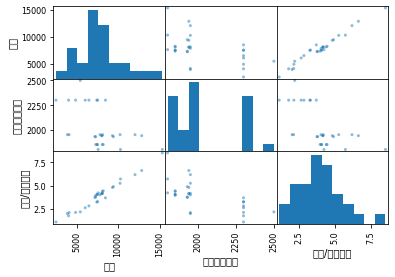

In [ ]:
_ = scatter_matrix(df)

### ●データ変換

In [ ]:
# DataFramとndarrayのデータ変換

df.loc[:,["歩数","摂取カロリー"]]

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [ ]:
# DataFrame → ndarray

# df.loc[:, ["歩数","摂取カロリー"]].values
df.loc[:, :].values

array([[5439, 2500.0, 2.1756, 'Low'],
       [2510, 2300.0, 1.0913043478260869, 'Low'],
       [10238, 1950.0, 5.25025641025641, 'Mid'],
       [8209, 1850.0, 4.437297297297297, 'Mid'],
       [9434, 1930.0, 4.888082901554404, 'Mid'],
       [7593, 1800.0, 4.218333333333334, 'Mid'],
       [9320, 1940.0, 4.804123711340206, 'Mid'],
       [4873, 2300.0, 2.118695652173913, 'Low'],
       [12045, 1950.0, 6.176923076923077, 'High'],
       [7493, 1850.0, 4.05027027027027, 'Mid'],
       [7289, 1930.0, 3.7766839378238344, 'Mid'],
       [6481, 2300.0, 2.8178260869565217, 'Low'],
       [10287, 1800.0, 5.715, 'Mid'],
       [8043, 1940.0, 4.145876288659794, 'Mid'],
       [7435, 2300.0, 3.232608695652174, 'Mid'],
       [7529, 2300.0, 3.2734782608695654, 'Mid'],
       [8031, 1940.0, 4.139690721649485, 'Mid'],
       [8475, 2300.0, 3.6847826086956523, 'Mid'],
       [8132, 1950.0, 4.17025641025641, 'Mid'],
       [15328, 1800.0, 8.515555555555556, 'High'],
       [12849, 1940.0, 6.6231958762

In [ ]:
#  ndarray → DataFrame

nd_arr = df.loc[:, ["歩数","摂取カロリー"]].values
df_2 = pd.DataFrame(nd_arr, columns=["歩数","摂取カロリー"])
df_2

,歩数,摂取カロリー
0,5439.0,2500.0
1,2510.0,2300.0
2,10238.0,1950.0
3,8209.0,1850.0
4,9434.0,1930.0
5,7593.0,1800.0
6,9320.0,1940.0
7,4873.0,2300.0
8,12045.0,1950.0
9,7493.0,1850.0
